<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="6">US Crime Rate Prediction Analysis</font></h1> 
<h2 align="center"><font size="4">Supervised Machine Learning: Regression - Final Assignment</font></h2>


### Import the required libraries


In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

np.set_printoptions(threshold=30)

### About the data

This is a dataset of 2018 US communities, demographics of each community, and their crime rates. The original dataset has 146 variables where the first four columns are community/location, the middle features are demographic information about each community such as population, age, race, income, and the final columns are types of crimes and overall crime rates.<br>
You can find the original dataset [here](https://www.kaggle.com/datasets/michaelbryantds/crimedata).

### Objectives

This will be a prediction-based analysis. The main objective of this report is to predict the rates of crime in US communities. <br>
This notebook will present a follow-on analysis from the EDA notebook where we performed feature engineering and hypothesis testing as a prelude to this analysis. You can find the EDA notebook [here](https://github.com/Kasheme/Data-Science/blob/main/US-Crime-Communities/US%20Crime%20Notebook%20EDA.ipynb) for reference.

# Linear Regression Analysis V1

In this regression project, we will build upon the work done in the EDA notebook where we performed feature selection in order to determine the most correlated features to our target variable. The data used will therefore only contain our selected, highly-correlated features.

## Importing the Dataset


In [2]:
data = pd.read_csv('crimedata.csv')
data.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In the EDA notebook, we have already performed an extensive analysis to select the appropriate features for this regression analysis. For the regression analysis, we are only going to concentrate on **predicting violent crime rates** for a given community. We will filter our dataframe by the columns that shown the highest correlation with violent crime rates straight away.

In [3]:
selected_cols = ['PctKidsBornNeverMar', 'nonViolPerPop', 'racepctblack', 'FemalePctDiv',
       'TotalPctDiv', 'pctWPubAsst', 'pctWInvInc', 'PctYoungKids2Par',
       'PctTeen2Par', 'racePctWhite', 'PctFam2Par', 'PctKids2Par',
       'ViolentCrimesPerPop']

In [4]:
df = data.loc[:, [i for i in selected_cols]]
df.columns.unique()

Index(['PctKidsBornNeverMar', 'nonViolPerPop', 'racepctblack', 'FemalePctDiv',
       'TotalPctDiv', 'pctWPubAsst', 'pctWInvInc', 'PctYoungKids2Par',
       'PctTeen2Par', 'racePctWhite', 'PctFam2Par', 'PctKids2Par',
       'ViolentCrimesPerPop'],
      dtype='object')

In [5]:
df.shape

(2215, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PctKidsBornNeverMar  2215 non-null   float64
 1   nonViolPerPop        2118 non-null   float64
 2   racepctblack         2215 non-null   float64
 3   FemalePctDiv         2215 non-null   float64
 4   TotalPctDiv          2215 non-null   float64
 5   pctWPubAsst          2215 non-null   float64
 6   pctWInvInc           2215 non-null   float64
 7   PctYoungKids2Par     2215 non-null   float64
 8   PctTeen2Par          2215 non-null   float64
 9   racePctWhite         2215 non-null   float64
 10  PctFam2Par           2215 non-null   float64
 11  PctKids2Par          2215 non-null   float64
 12  ViolentCrimesPerPop  1994 non-null   float64
dtypes: float64(13)
memory usage: 225.1 KB


As you can see, the each feature of the dataset is of the type float. The features with missing data is *ViolentCrimesPerPop* and *nonViolPerPop*. *ViolentCrimesPerPop* is our predictor variable. We will handle this before we begin our modelling.

In [7]:
df.describe()

,PctKidsBornNeverMar,nonViolPerPop,racepctblack,FemalePctDiv,TotalPctDiv,pctWPubAsst,pctWInvInc,PctYoungKids2Par,PctTeen2Par,racePctWhite,PctFam2Par,PctKids2Par,ViolentCrimesPerPop
count,2215.000000,2118.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,1994.000000
mean,3.115499,4908.241804,9.335102,12.325300,10.812515,6.801445,43.750935,81.865422,75.521788,83.979819,74.059129,71.227255,589.078922
std,3.127681,2739.708901,14.247156,3.262613,3.000883,4.700335,12.787925,12.263736,10.365262,16.419080,10.525952,12.045048,614.784518
min,0.000000,116.790000,0.000000,3.350000,2.830000,0.180000,5.810000,8.700000,20.200000,2.680000,22.970000,18.300000,0.000000
25%,1.070000,2918.070000,0.860000,9.860000,8.575000,3.270000,34.680000,74.780000,70.170000,76.320000,67.900000,63.990000,161.700000
50%,2.040000,4425.450000,2.870000,12.520000,10.900000,5.610000,42.880000,83.990000,76.920000,90.350000,75.030000,72.530000,374.060000
75%,3.910000,6229.280000,11.145000,14.745000,12.985000,9.105000,52.740000,91.675000,82.765000,96.225000,81.900000,80.395000,794.400000
max,27.350000,27119.760000,96.670000,23.920000,22.230000,44.820000,89.040000,100.000000,97.340000,99.630000,93.600000,92.580000,4877.060000


In [8]:
df.isna().sum()

PctKidsBornNeverMar      0
nonViolPerPop           97
racepctblack             0
FemalePctDiv             0
TotalPctDiv              0
pctWPubAsst              0
pctWInvInc               0
PctYoungKids2Par         0
PctTeen2Par              0
racePctWhite             0
PctFam2Par               0
PctKids2Par              0
ViolentCrimesPerPop    221
dtype: int64

## 1. Data Pre-Processing

#### Data Cleansing - Handling missing values

*nonViolPerPop*

In [9]:
# check median and mean
print(f"median: {df['nonViolPerPop'].median()}")
print(f"mean: {df['nonViolPerPop'].mean()}")

median: 4425.450000000001
mean: 4908.241803588291


In [10]:
# Replace missing values in the nonViolPerPop column with the median
df['nonViolPerPop'].fillna(value=df['nonViolPerPop'].median(), inplace=True)

*ViolentCrimesPerPop*

In [11]:
# check median and mean
print(f"median: {df['ViolentCrimesPerPop'].median()}")
print(f"mean: {df['ViolentCrimesPerPop'].mean()}")

median: 374.06
mean: 589.0789217652958


In [12]:
# Replace missing values in the ViolentCrimesPerPop column with the median
df['ViolentCrimesPerPop'].fillna(value=df['ViolentCrimesPerPop'].median(), inplace=True)

In [13]:
df.isna().sum()

PctKidsBornNeverMar    0
nonViolPerPop          0
racepctblack           0
FemalePctDiv           0
TotalPctDiv            0
pctWPubAsst            0
pctWInvInc             0
PctYoungKids2Par       0
PctTeen2Par            0
racePctWhite           0
PctFam2Par             0
PctKids2Par            0
ViolentCrimesPerPop    0
dtype: int64

#### *Replicating feature engineering steps taken in EDA notebook*

### Log Transformation for target variable

Violent crimes per population skewness level: 2.2438450029735475


<Axes: >

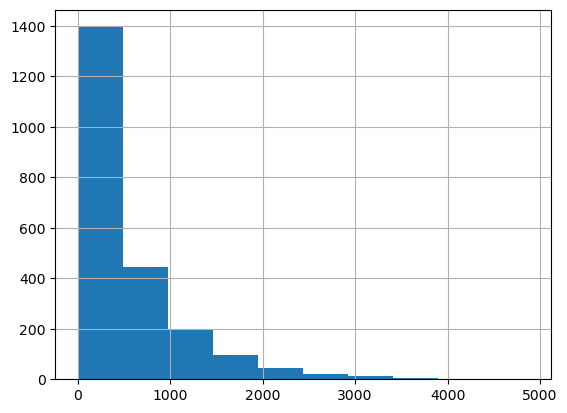

In [14]:
# Assessing if our target variable is normally distributed
print(f"Violent crimes per population skewness level: {df.ViolentCrimesPerPop.skew()}")
df.ViolentCrimesPerPop.hist()

c:\Users\User\miniconda3\envs\snowflakes\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


New skewness level for Violent Crimes Per Pop: -0.4242089869933065


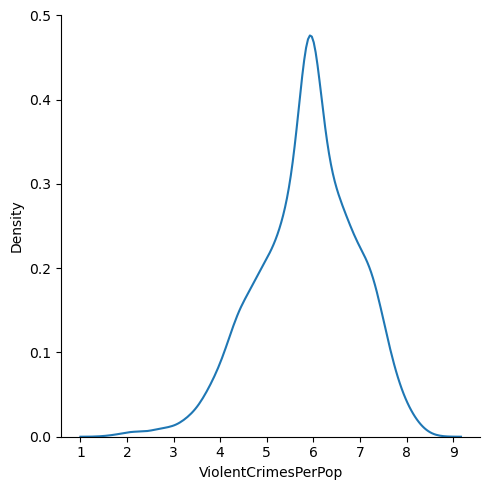

In [15]:
V_log_transformed = np.log(df["ViolentCrimesPerPop"])
is_finite = V_log_transformed[np.isfinite(V_log_transformed)]
# the np.isfinite() function will give you a boolean array the same size as the input array that is True wherever the observation is finite, i.e. non-Nan and non-inf.
print(f"New skewness level for Violent Crimes Per Pop: {is_finite.skew()}")
sns.displot(is_finite, kind='kde')

In [16]:
print(len(is_finite))
print(len(df.ViolentCrimesPerPop))

2214
2215


 When you perform a log transformation, values that are zero or negative in the original data will become undefined or result in negative infinity. These values will be **excluded from the is_finite array** because np.isfinite() will return False for them.

NaN Values: If there are any NaN (Not a Number) values in your original data, they will also be excluded from the is_finite array because np.isfinite() will return False for them.

In [17]:
# Check for zero or negative values in the original target variable
non_positive_values = df["ViolentCrimesPerPop"] <= 0
print("Number of non-positive values:", np.sum(non_positive_values))

# Check for NaN values in the original target variable
nan_values = np.isnan(df["ViolentCrimesPerPop"])
print("Number of NaN values:", np.sum(nan_values))


Number of non-positive values: 1
Number of NaN values: 0


However, we want to use this *is_finite* array for the remainder of our regression analysis. Therefore, we will perform the log transform again but this time replace NaN and negative values with 0 instead of removing them from the array altogether. This will allow us to align our predictor variables with our transformed target variable.

In [18]:
V_log_transformed = np.log(df["ViolentCrimesPerPop"])
# Replace negative values with 0
V_log_transformed[V_log_transformed < 0] = 0

# Replace NaN values with 0
V_log_transformed = np.nan_to_num(V_log_transformed)
is_finite = np.isfinite(V_log_transformed)

print(len(df.ViolentCrimesPerPop))
print(len(V_log_transformed))
print(len(is_finite))

2215
2215
2215


c:\Users\User\miniconda3\envs\snowflakes\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Feature Scaling for selected features

In [19]:
selected_colsX = selected_cols
selected_colsX.pop()

'ViolentCrimesPerPop'

In [20]:
selected_colsX

['PctKidsBornNeverMar',
 'nonViolPerPop',
 'racepctblack',
 'FemalePctDiv',
 'TotalPctDiv',
 'pctWPubAsst',
 'pctWInvInc',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'racePctWhite',
 'PctFam2Par',
 'PctKids2Par']

In [21]:
selected_data = df.loc[:,selected_colsX]

In [22]:
data_standardized = StandardScaler().fit_transform(selected_data)
np.set_printoptions(precision=6, threshold=5)
data_standardized

array([[-0.881203, -1.30306 , -0.559192, ...,  0.475175,  1.650662,
         1.573013],
       [-0.919578, -1.093616, -0.599209, ...,  0.706056,  1.221151,
         1.171098],
       [-0.714908,  0.477723, -0.603422, ...,  0.630518,  0.425794,
         0.632996],
       ...,
       [-0.484653, -0.086895, -0.618867, ...,  0.526347,  0.2576  ,
         0.246858],
       [-0.244805,  0.169302, -0.418782, ..., -0.857112, -0.598573,
        -0.645826],
       [ 0.55469 ,  1.474273, -0.487583, ..., -0.774263, -1.0851  ,
        -0.913217]])

In [23]:
print(len(selected_data))
print(len(data_standardized))

2215
2215


In [24]:
X = pd.DataFrame(data_standardized, columns=selected_cols)
X.head(3)

,PctKidsBornNeverMar,nonViolPerPop,racepctblack,FemalePctDiv,TotalPctDiv,pctWPubAsst,pctWInvInc,PctYoungKids2Par,PctTeen2Par,racePctWhite,PctFam2Par,PctKids2Par
0,-0.881203,-1.303060,-0.559192,-2.178286,-2.114026,-1.228157,2.068751,1.134868,1.957769,0.475175,1.650662,1.573013
1,-0.919578,-1.093616,-0.599209,-1.801203,-1.797381,-0.862143,1.592413,1.219690,1.055514,0.706056,1.221151,1.171098
2,-0.714908,0.477723,-0.603422,0.746411,0.579122,-0.821711,0.936960,0.856750,0.019127,0.630518,0.425794,0.632996


Use the is_finite Array to Filter the Feature Matrix and Target Variable:

In [25]:
y = V_log_transformed  # Log-transformed target variable

# Use the is_finite array to filter X and y
X_finite = X[is_finite]
y_finite = y[is_finite]


In [26]:
print(len(X_finite))
print(len(y_finite))

2215
2215


In [27]:
X_finite['ViolentCrimesPerPop'] = y_finite

In [28]:
X_finite.isnull().sum()

PctKidsBornNeverMar    0
nonViolPerPop          0
racepctblack           0
FemalePctDiv           0
TotalPctDiv            0
pctWPubAsst            0
pctWInvInc             0
PctYoungKids2Par       0
PctTeen2Par            0
racePctWhite           0
PctFam2Par             0
PctKids2Par            0
ViolentCrimesPerPop    0
dtype: int64

Drop rows where target variable is 0, meaning it was negative value (1 in total) or NaN (0 in total).

In [29]:
index_to_drop = list(X_finite[X_finite['ViolentCrimesPerPop'] == 0].index)

In [30]:
df_transformed = X_finite.drop(index=index_to_drop)
df_transformed = df_transformed.reset_index().drop(columns='index')

In [31]:
# df_transformed.iloc[[1394,1395,1396,1397],:]

In [32]:
X_transformed = df_transformed.iloc[:,:-1]
y_transformed = df_transformed['ViolentCrimesPerPop']

In [33]:
X_transformed.fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13836\3039963652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_transformed.fillna(0, inplace=True)


## 2. Linear Regression Models

Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

In [34]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
kf.split(X_transformed)

<generator object _BaseKFold.split at 0x000001E4461E2D60>

### 4a. Testing various methods - for educational purposes only
* cross validation
* cross validation using cross_val_predict
* hyperparameter tuning for Lasso 
* GridSearchCV for Ridge

#### Cross Validation

In [35]:
for train_index, test_index in kf.split(X_transformed):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    # we're just looking at the first 10 values of our folds
    print('')

Train index: [ 0  1  2 ... 10 11 12] 1476
Test index: [ 3  6  9 ... 26 30 33] 738

Train index: [ 3  5  6 ... 11 13 15] 1476
Test index: [ 0  1  2 ... 20 21 23] 738

Train index: [ 0  1  2 ... 12 14 15] 1476
Test index: [ 5  7  8 ... 25 28 29] 738



In [37]:
#from sklearn.metrics import r2_score, mean_squared_error
#X_finite_pred = X_finite.drop(columns='ViolentCrimesPerPop')
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X_transformed):
    X_train, X_test, y_train, y_test = (X_transformed.iloc[train_index, :], 
                                        X_transformed.iloc[test_index, :], 
                                        y_transformed[train_index], 
                                        y_transformed[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.6044371272262103, 0.5923881694342306, 0.5439277469396088]

#### Cross Validation using cross_val_predict

In [38]:
s = StandardScaler()
lr = LinearRegression()

In [39]:
# create pipeline object
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])
estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [40]:
# kf = KFold(shuffle=True, random_state=72018, n_splits=3)
predictions = cross_val_predict(estimator, X_transformed, y_transformed, cv=kf)

In [41]:
print(r2_score(y_transformed, predictions))
print(np.mean(scores)) # almost identical to our earlier process!

0.5808186921734353
0.5802510145333498


#### Hyperparamater tuning - Lasso Regression

**Hyperparameter tuning** involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that _generalizes_ well outside of your sample.

In [121]:
# generate a list of length 10 called `alphas` for hyperparameter tuning:
alphas = np.geomspace(1e-9, 1e0, num=10)
print(alphas)

[1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


In [43]:
# generate a list of length 10 called `alphas` for hyperparameter tuning:
alphas = np.geomspace(1e-9, 1e0, num=10)
print(alphas)

scores_ = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv=kf)
    
    score_ = r2_score(y_transformed, predictions)
    
    scores_.append(score_)
print(scores_)

[0.5808186931151128, 0.5808187015908124, 0.5808187863347576, 0.5808196336062397, 0.5808280827117336, 0.5809101504951729, 0.5811877306782308, 0.5764773902623448, 0.5525498408488156, -0.0005608425806433726]


In [44]:
list(zip(alphas,scores_))

[(1e-09, 0.5808186931151128),
 (1e-08, 0.5808187015908124),
 (1e-07, 0.5808187863347576),
 (1e-06, 0.5808196336062397),
 (1e-05, 0.5808280827117336),
 (0.0001, 0.5809101504951729),
 (0.001, 0.5811877306782308),
 (0.01, 0.5764773902623448),
 (0.1, 0.5525498408488156),
 (1.0, -0.0005608425806433726)]

In [45]:
Lasso(alpha=0.001).fit(X_transformed, y_transformed).coef_

array([ 0.048069,  0.293119, -0.224787, ..., -0.334099,  0.193306,
       -0.624494])

#### Grid Search CV - Ridge Regression 

- use `KFolds` and manually create a loop to do cross-validation
- use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one - hyper-parameter tuning 

In [46]:
alphas_ = np.geomspace(5, 30, 30)

Ridge Regression

In [127]:
# generate kfolds object
#kf = KFold(shuffle=True, random_state=72018, n_splits=3)
#kf.split(X_transformed)

# Same estimator as before
ridge_estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

ridge_params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': alphas_
}

ridge_grid = GridSearchCV(estimator, ridge_params, cv=kf)

In [128]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 5.      ,  5.318667,  5.657644,  6.018225,  6.401787,  6.809795,
        7.243806,  7.705479,  8.196575,  8.718971,  9.274661,  9.865766,
       10.494545, 11.163398, 11.87488 , 12.631707, 13.436768, 14.29314 ,
       15.20409 , 16.173099, 17.203866, 18.300327, 19.466669, 20.707346,
       22.027096, 23.430958, 24.924293, 26.512803, 28.202555, 30.      ])})

In [88]:
# View total amount of train and test indexes in each split
train_sum = 0
test_sum = 0
# Accessing train and test indices for each split
for i, (train_idx, test_idx) in enumerate(kf.split(X_transformed)):
    print(f'train/test split: {i}')
    train_sum += len(train_idx)
    test_sum += len(test_idx)
    print(f"Total Train Indices: {train_sum}")
    print(f"Total Test Indices: {test_sum}")
    print('\n')
    train_sum = 0
    test_sum = 0


train/test split: 0
Total Train Indices: 1476
Total Test Indices: 738


train/test split: 1
Total Train Indices: 1476
Total Test Indices: 738


train/test split: 2
Total Train Indices: 1476
Total Test Indices: 738




##### Interpret ridge model results & Predict using best params

Display results of each test set for ridge

In [97]:
cv_results = ridge_grid.cv_results_

# Displaying scores for each test set in each fold
for i in range(ridge_grid.n_splits_): # == number of splits in kfold object == 3
    print(f"Fold {i + 1} - Test Set Scores: {cv_results[f'split{i}_test_score']}")
    print(f"mean test score: {np.mean(cv_results[f'split{i}_test_score'])}")

# Displaying mean and standard deviation of scores across folds
print(f"\nMean Test Scores: {cv_results['mean_test_score']}")
print(f"Standard Deviation of Test Scores: {cv_results['std_test_score']}")

np.set_printoptions(threshold=10)


Fold 1 - Test Set Scores: [0.605886 0.605922 0.605955 ... 0.583077 0.584133 0.585129]
mean test score: 0.5961633307581568
Fold 2 - Test Set Scores: [0.591642 0.591606 0.59157  ... 0.332917 0.339856 0.346614]
mean test score: 0.47998487253887795
Fold 3 - Test Set Scores: [0.543829 0.54381  0.54379  ... 0.560659 0.561854 0.562903]
mean test score: 0.5477895106599926

Mean Test Scores: [0.580452 0.580446 0.580438 ... 0.492218 0.495281 0.498215]
Standard Deviation of Test Scores: [0.026542 0.026557 0.026571 ... 0.113014 0.110278 0.107582]


In [77]:
# length of the results should equal the number of ridge regression alphas multipled by polynomial features degrees - i.e. 30 x 3
len(cv_results[f'split{1}_test_score'])

90

In [313]:
# find best score and best parameters
ridge_grid.best_score_, ridge_grid.best_params_

(0.602288463518723,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 30.0})

In [307]:
y_predict = ridge_grid.predict(X_test)
y_predict

array([6.056951, 6.329035, 5.447788, ..., 6.152688, 5.726159, 5.778889])

In [309]:
# This includes both in-sample and out-of-sample
r2_score(y_test, y_predict)

0.5953542347788281

In [312]:
# Calculate residuals
np.sqrt(mean_squared_error(y_test, y_predict))

0.6605342282104024

#### Re-train on data with "best" parameters

In [ ]:
best_alpha = ridge_grid.best_params_['ridge_regression__alpha']
# create a new instance of the Ridge Regression model with the best alpha:
ridge_model_best_alpha = Ridge(alpha=best_alpha)
# Next, fit the model on your training data using the best alpha:
ridge_model_best_alpha.fit(X_train, y_train)
# replace old ridge rmse score with new score following re-training
new_ridge_rmse = np.sqrt(mean_squared_error(y_test, predictions))

### 4b. Actual Analysis - Calculate and compare the RMSE calculation for Basic LR, Ridge and Lasso models

In [53]:
from sklearn.linear_model import RidgeCV, LassoCV

In [150]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

**Basic Linear Regression**

In [321]:
# Initialize lists to store train-test splits
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# Loop through kf object
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    # Append current train-test splits to the lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)


There are many different ways in which we could analyse the predictions from each of our fitted models such as 
* **Evaluate seperately** - calculate RMSE separately for each model and choose best performing or analyse seperately
* **Average predictions** - calculate average for each data point across all models and evaluate the performance of the ensemble of the models using the average predictions - *can improve prediction accuracy by reducing variance*
* **Weighted average predictions** - similar to averaging predictions, but assign weights to each model's prediction based on its perfromance (e.g. using validation scores) - then calculate the weighted average prediction - *can give more importance to better-performing models*
* **Ensemble techniques** - Combine predictions from multiple models using ensemble techniques such as bagging, boosting, or stacking. Ensemble techniques aim to leverage the strengths of different models to improve overall performance. <br> <br>
Here we will analyse the predictions using the <span style="color: green">**Average predictions**</span> method


In [362]:
rmse_lr_scores = []
# Initiialise basic lr model
lr = LinearRegression()

# Iterate over train-test splits
for X_train, y_train, X_test, y_test in zip(X_train_list, y_train_list, X_test_list, y_test_list):
    # fit each model and append to the list
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_lr_scores.append(rmse_score)
    
linearRegression_rmse_avg = np.mean(rmse_lr_scores)
linearRegression_rmse_max = np.max(rmse_lr_scores)
print(f"basic LinearRegression model average RMSE: {linearRegression_rmse_avg}")
print(f"basic LinearRegression model max RMSE: {linearRegression_rmse_max}")

basic LinearRegression model average RMSE: 0.6305488885520462
basic LinearRegression model max RMSE: 0.6579716162013279


**Ridge Model**

In [363]:
rmse_ridge_scores = []

# specify alphas and initialise ridge model
ridge_alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=ridge_alphas, cv=kf)

for X_train_r, y_train_r, X_test_r, y_test_r in zip(X_train_list, y_train_list, X_test_list, y_test_list):
    # fit each ridge model and save to list
    ridgeCV.fit(X_train_r, y_train_r)
    predictions_r = ridgeCV.predict(X_test_r)
    rmse_score_r = rmse(y_test_r, predictions_r)
    rmse_ridge_scores.append(rmse_score_r)

ridge_rmse_avg = np.mean(rmse_ridge_scores)
ridge_rmse_max = np.max(rmse_ridge_scores)
print(f"ridge regression model average rmse: {ridge_rmse_avg}")
print(f"ridge regression model max rmse: {ridge_rmse_max}")

ridge regression model average rmse: 0.5956598988553471
ridge regression model max rmse: 0.6241138218709364


In [365]:
rmse_lasso_scores = []

# specify alphas and initialise lasso model
lasso_alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
lassoCV = LassoCV(alphas=lasso_alphas, cv=kf, max_iter=100000)

for X_train_l, y_train_l, X_test_l, y_test_l in zip(X_train_list, y_train_list, X_test_list, y_test_list):
    # fit each lasso model and save to list
    lassoCV.fit(X_train_l, y_train_l)
    predictions_l = lassoCV.predict(X_test_l)
    rmse_score_l = rmse(y_test_l, predictions_l)
    rmse_lasso_scores.append(rmse_score_l)

lasso_rmse_avg = np.mean(rmse_lasso_scores)
lasso_rmse_max = np.max(rmse_lasso_scores)
print(f"lasso regression model average rmse: {lasso_rmse_avg}")
print(f"lasso regression model max rmse: {lasso_rmse_max}")

lasso regression model average rmse: 0.5998852334911937
lasso regression model max rmse: 0.6247516996182291


In [376]:
# Determine how many features  from Lasso model remian non-zero:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 119 coefficients, 57 are non-zero with Lasso.


In [375]:
rmse_df_analysis1 = pd.DataFrame(
    data=[['Basic LR', linearRegression_rmse_avg, linearRegression_rmse_max], ['Ridge', ridge_rmse_avg, ridge_rmse_max], ['Lasso', lasso_rmse_avg, lasso_rmse_max]],
    columns=['Model', 'RMSE Avg', 'RMSE Max']
    )
rmse_df_analysis1

,Model,RMSE Avg,RMSE Max
0,Basic LR,0.630549,0.657972
1,Ridge,0.595660,0.624114
2,Lasso,0.599885,0.624752


We can see that the effects of both Lasso and Ridge are limited in improving the performance of the model. This is likely because the input data to the model was already feature engineered to only include features with high degree of correlation to the target variable. <br>
In the next analysis, we will use the original dataset for the LinearRegression model. This way we will be able to better assess the performance impact of the regularisation models. 

#### Plot the predicted vs actual crime rates based on each model

[Text(0.5, 0, 'Actual Crime Rates'),
 Text(0, 0.5, 'Predicted Crime Rates'),
 Text(0.5, 1.0, 'Linear Regression Results')]

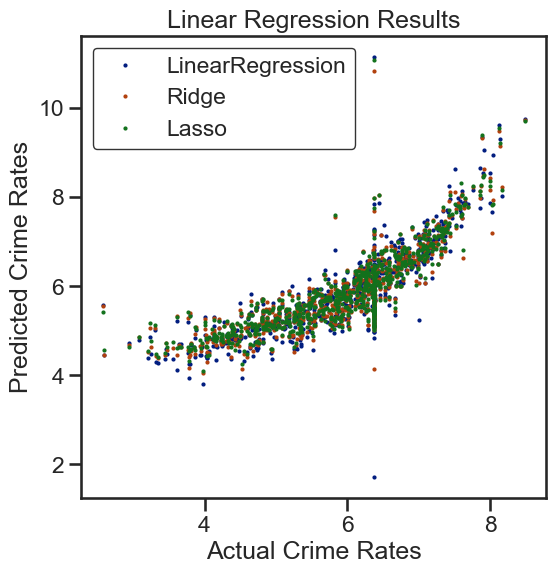

In [377]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['LinearRegression', 'Ridge', 'Lasso']

models = [lr, ridgeCV, lassoCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=2.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)

ax.set(xlabel='Actual Crime Rates', 
       ylabel='Predicted Crime Rates', 
       title='Linear Regression Results')

# Linear Regression Analysis V2

In this regression project, we will add more features to to the data and assess the impact of regularisation in improving the performance of the LR model (hopefully). 

## Importing the Dataset

In [171]:
data_full = pd.read_csv('crimedata.csv')
data_full.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [158]:
data.shape

(2215, 146)

## 1. Data Pre-Processing

### Handling Missing Data

In [172]:
missing_df = pd.DataFrame(data_full.isna().sum()).rename(columns={0:'missing'}).reset_index()
missing_df = missing_df[missing_df['missing'] > 0]
missing_df.sort_values(by='missing', ascending=False)

,index,missing
122,PolicCars,1872
125,LemasGangUnitDeploy,1872
123,PolicOperBudg,1872
118,PolicAveOTWorked,1872
117,NumKindsDrugsSeiz,1872
116,OfficAssgnDrugUnits,1872
115,PctPolicMinor,1872
114,PctPolicAsian,1872
113,PctPolicHisp,1872
112,PctPolicBlack,1872


For a start, we'll drop all the columns that have more than 1000 missing observations as this is >40% of the overall dataset so just too much to be useful for our analysis

In [173]:
features_to_drop = missing_df[missing_df['missing'] > 1000]['index'].to_list()
data_full.drop(columns=features_to_drop, inplace = True)
data_full.shape

(2215, 122)

For the remaining features with missing observations, we will replace them with the mean.

In [176]:
features_to_fill = missing_df[missing_df['missing'] < 1000]['index'].to_list()

In [177]:
for feature in features_to_fill:
    mean = data_full[feature].mean()
    data_full[feature].fillna(value=mean, inplace=True)

In [179]:
# view total number of missing observations in data
sum(data_full.isna().sum())

0

Log Transformation on target variable

In [212]:
V_log_transformed = np.log(data_full["ViolentCrimesPerPop"])
is_finite = V_log_transformed[np.isfinite(V_log_transformed)]

# Replace negative values with 0
V_log_transformed[V_log_transformed < 0] = 0

# Replace NaN values with 0
V_log_transformed = np.nan_to_num(V_log_transformed)
is_finite = np.isfinite(V_log_transformed)

# assign y variable
y_array = V_log_transformed

print(len(data_full.ViolentCrimesPerPop))
print(len(V_log_transformed))
print(len(is_finite))

2215
2215
2215


c:\Users\User\miniconda3\envs\snowflakes\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Feature Scaling on predictor variables

In [189]:
X_non_standardised = data_full.drop(columns=['ViolentCrimesPerPop','communityName','state'])
data_standardised = StandardScaler().fit_transform(X_non_standardised)
# assign X variable
X = pd.DataFrame(data_standardised, columns=list(X_non_standardised.columns))
X.head(3)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,nonViolPerPop
0,-0.201091,1.175511,-0.559192,0.475175,0.856235,-0.416149,-0.437364,-1.004000,-0.510125,-0.106018,...,-0.790188,-0.240355,-1.204435,-0.263327,-1.179670,-0.153812,-0.679688,-0.163927,-0.409807,-1.311840
1,-0.146622,0.337299,-0.599209,0.706056,0.172105,-0.486762,-0.760544,-1.026653,-0.585510,1.118732,...,-0.631690,-0.226523,-1.037232,-0.231985,-0.933986,-0.150740,-0.720762,-0.169598,-0.726331,-1.102253
2,-0.116212,-0.830211,-0.603422,0.630518,0.169869,-0.383928,-0.683070,-0.285567,-0.496724,-0.325845,...,-0.776613,-0.156724,-0.360958,-0.044857,0.841868,-0.116948,-0.193700,-0.050513,0.747484,0.470154


In [258]:
# add target variable array to X dataframe so we can extract it as a pandas series
X['ViolentCrimesPerPop'] = y_array
y = X['ViolentCrimesPerPop']
X.drop(columns=['ViolentCrimesPerPop'], inplace=True)

In [210]:
sum(is_finite)

2215

*No need to filter the dataset with the is_finite array as each observation is finite*

## 2. Linear Regression Analysis

Obtain our train test splits from our KFolds object

In [215]:
kf = KFold(n_splits=3, random_state=72000, shuffle=True)

In [378]:
# Initialize lists to store train-test splits
X_train_list1 = []
X_test_list1 = []
y_train_list1 = []
y_test_list1 = []

# Loop through kf object
for train_index, test_index in kf.split(X):
    X_train_1, X_test_1 = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_1, y_test_1 = y[train_index], y[test_index]
    
    # Append current train-test splits to the lists
    X_train_list1.append(X_train_1)
    X_test_list1.append(X_test_1)
    y_train_list1.append(y_train_1)
    y_test_list1.append(y_test_1)


**Basic Linear Regression Model**

In [380]:
rmse_lr_scores1 = []
# Initiialise basic lr model
lr1 = LinearRegression()

# Iterate over train-test splits
for X_train1, y_train1, X_test1, y_test1 in zip(X_train_list1, y_train_list1, X_test_list1, y_test_list1):
    # fit each model and append to the list
    lr1.fit(X_train1, y_train1)
    predictions1 = lr.predict(X_test1)
    rmse_score1 = np.sqrt(mean_squared_error(y_test1, predictions1))
    rmse_lr_scores1.append(rmse_score1)
    
linearRegression_rmse_avg1 = np.mean(rmse_lr_scores1)
linearRegression_rmse_max1 = np.max(rmse_lr_scores1)
print(f"basic LinearRegression model average RMSE: {linearRegression_rmse_avg1}")
print(f"basic LinearRegression model max RMSE: {linearRegression_rmse_max1}")

basic LinearRegression model average RMSE: 0.5687262799059941
basic LinearRegression model max RMSE: 0.5990700583368002


**Ridge Model**

In [381]:
#alphas_R = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
alphas_R = np.geomspace(1e-9, 1e0, num=10)

# Same estimator as before
estimator_R = Pipeline([
        ("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params_R = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': alphas_R
}
# Initiialise ridge model
grid_R = GridSearchCV(estimator_R, params_R, cv=kf)

In [386]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# create empty list for ridge rmse scores
rmse_ridge_scores1 = []

# Iterate over train-test splits
for X_train1, y_train1, X_test1, y_test1 in zip(X_train_list1, y_train_list1, X_test_list1, y_test_list1):
    # fit each model and append to the list
    grid_R.fit(X_train1, y_train1)
    ridge_predictions1 = grid_R.predict(X_test1)
    rmse_ridge_score1 = np.sqrt(mean_squared_error(y_test1, ridge_predictions1))
    rmse_ridge_scores1.append(rmse_ridge_score1)
    
ridge_rmse_avg1 = np.mean(rmse_ridge_scores1)
ridge_rmse_max1 = np.max(rmse_ridge_scores1)
print(f"basic ridge model average RMSE: {ridge_rmse_avg1}")
print(f"basic ridge model max RMSE: {ridge_rmse_max1}")

basic ridge model average RMSE: 0.6169511336855942
basic ridge model max RMSE: 0.6356538386284033


**Lasso Model**

*Hyperparameter tuning*<br><br>
Since we can't use GridSearchCV to search over a specified list of parameters like we can with Ridge, we have to do our hyperparameter tuning for Lasso outside of our estimator.

In [395]:
# create train test splits for purpose of Lasso hyperparameter tuning
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X, y, test_size=0.3, random_state=42)

In [398]:
# generate a list of length 10 called `alphas` for hyperparameter tuning:
alphas = np.geomspace(1e-9, 1e0, num=10)

scores_list = []
alphas_list = []
rmse_lasso_scores2 = []
    
for alpha in alphas:
    # initialise lasso model
    las = Lasso(alpha=alpha, max_iter=10000)
    # fit each model and append to the list
    las.fit(X_train_L, y_train_L)
    lasso_predictions = las.predict(X_test_L)

    score_L = r2_score(y_test_L, lasso_predictions)
    alphas_list.append(alpha)
    scores_list.append(score_L)
alphas_scores = list(zip(alphas_list, scores_list))
print(alphas_scores)
        

[(1e-09, 0.6987788745841856), (1e-08, 0.6987790610756079), (1e-07, 0.6987809256429205), (1e-06, 0.6987995369067423), (1e-05, 0.6989845015445348), (0.0001, 0.7000410603454147), (0.001, 0.6975933781743884), (0.01, 0.6775567666197875), (0.1, 0.6203330043346083), (1.0, -0.0026738315332148765)]


In [413]:
estimator_L = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial features", PolynomialFeatures()),
    ("lasso regression", Lasso(alpha=0.1))
])

In [414]:
# create empty list for lasso rmse scores
rmse_lasso_scores1 = []

# Iterate over train-test splits
for X_train1, y_train1, X_test1, y_test1 in zip(X_train_list1, y_train_list1, X_test_list1, y_test_list1):
    # fit each model and append to the list
    estimator_L.fit(X_train1, y_train1)
    lasso_predictions1 = estimator_L.predict(X_test1)
    rmse_lasso_score1 = np.sqrt(mean_squared_error(y_test1, lasso_predictions1))
    rmse_lasso_scores1.append(rmse_lasso_score1)
    
lasso_rmse_avg1 = np.mean(rmse_lasso_scores1)
lasso_rmse_max1 = np.max(rmse_lasso_scores1)
print(f"basic lasso model average RMSE: {lasso_rmse_avg1}")
print(f"basic lasso model max RMSE: {lasso_rmse_max1}")

basic lasso model average RMSE: 0.6022191465183341
basic lasso model max RMSE: 0.627133352087093


In [415]:
rmse_lasso_scores1

[0.608292283762594, 0.5712318037053153, 0.627133352087093]

Even though the alpha value of **0.0001** performed the best in hyperparameter tuning, the results of the model thereafter were suspicipusly high. This suggests that the model is overfitting with that alpha value. It also suggests that the model was too sensitive to certain subsets of the data, or that it struggles to generalise well to certain patterns or distributions present in a partocular fold or folds. A good next step here would be to investigate with more alpha parameters or to try and investigate the reasons behind the variability.<br>
For now though, since we achieve some relative consistency with an alpha value of **0.1**, we will use that for our Lasso model.

In [416]:
rmse_df_analysis2 = pd.DataFrame(columns=['model', 'RMSE Avg', 'RMSE Max'],
                                 data=[['Basic LR', linearRegression_rmse_avg1, linearRegression_rmse_max1],
                                       ['Ridge', ridge_rmse_avg1, ridge_rmse_max1],
                                       ['Lasso', lasso_rmse_avg1, lasso_rmse_max1]
                                       ])
rmse_df_analysis2

,model,RMSE Avg,RMSE Max
0,Basic LR,0.568726,0.599070
1,Ridge,0.616951,0.635654
2,Lasso,0.602219,0.627133


## 3. Insight and Key Findings

#### Analysis 1 - Insight

In [417]:
rmse_df_analysis1

,Model,RMSE Avg,RMSE Max
0,Basic LR,0.630549,0.657972
1,Ridge,0.595660,0.624114
2,Lasso,0.599885,0.624752


In the first analysis where we used feature engineering to only include the highest correlated features as our predictor variables, the basic linear regression model performed the best. That reached 0.63 avg rmse and max 0.66. For this analysis, the regularisation methods were not very impactful which indicates a number of things:
* **Small coefficients** - The coefficients of the features in our dataset may already be quite small and therefore regularisation might not shrink them further significantly. This could be the case since our dataset doesn't have outliers or extreme values that heavily influence the coefficient estimates.
* **Appropriate Model Complexity** - Our basic Linear Regression model may already have an appropriate level of complexity and not be overfitting. Therefore regularisation  may not provide much improvement.

#### Analysis 1 - Next Steps

* **Hyperparameter tuning** - conduct more rigorous hyperparameter tuning for Ridge and Lasso regression models to try and find a more suitable alpha value for each model
* **Different scaling technique** - establish a pipeline using a different scaler to see if it has any different effect on the coefficients - perhaps MinMaxScaler
* **Modify feature engineering** - add some more features into our *selected_features* object to see of we can increase the complexity of the model

#### Analysis 2 - Insight

In [418]:
rmse_df_analysis2

,model,RMSE Avg,RMSE Max
0,Basic LR,0.568726,0.599070
1,Ridge,0.616951,0.635654
2,Lasso,0.602219,0.627133


In the second analysis, we didn't perform any feature engineering or feature selection besides removing the features with 40-50% of missing data. Because of this, both the regularisation models were more impactful in shrinking some our coefficients (Ridge) or removing them (Lasso). Both of our regularisation models improved the rmse on our basic LR model by 3-5 percentage points. 

#### Analysis 2 - Next Steps

* **Hyperparameter tuning** - conduct more rigorous hyperparameter tuning for Lasso regression model to try and find a more suitable alpha value for each model
* **Run Elastic Net model** - perform an Elastic Net regression analysis and see how it perforsm in comparison with the other techniques
* **Different scaling technique** - establish a pipeline using a different scaler to see if it has any different effect on the coefficients - perhaps MinMaxScaler
* **Explore Stochastic gradient descent** - unlikely to be high-performing as SGD works best on large datasets but worth a try

---